In [42]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
#loading the dataset
df = pd.read_csv(r'C:\Users\Hp\Downloads\churn.csv')
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [44]:
#checking the shape of the dataset
df.shape

(10000, 14)

In [45]:
#drop coulumns
df = df.drop(['RowNumber','CustomerId','Surname'], axis=1)

In [46]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [47]:
#column data types
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [48]:
#dulicate values
df.duplicated().sum()

np.int64(0)

In [49]:
#rename column
df.rename(columns={'Exited':'Churn'}, inplace=True)

In [50]:
#descriptive statistics
df.describe()

CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary         Churn  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769  
min        0.00000        0.000000        11.580000      0.000000  
25%        0.00000        0.000000     51002.110000      0.000000  
50%        1.00000        1.000000    100193.915000      0.000000  
75%        1.00000        1.000000    149388.247500      0.000000  
max        1.00000        1.000000    199992.480000      1.000000

In [51]:
df.head()

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Churn  
0          1               1        101348.88      1  
1          0               1        112542.58      0  
2          1               0        113931.57      1  
3          0               0         93826.63      0  
4          1               1         79084.10      0

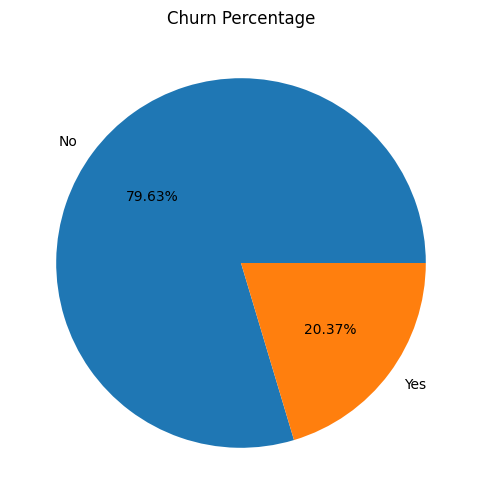

In [52]:
#pie chart
plt.figure(figsize=(10,6))
plt.pie(df['Churn'].value_counts(),labels=['No','Yes'],autopct='%1.2f%%')
plt.title('Churn Percentage')
plt.show()

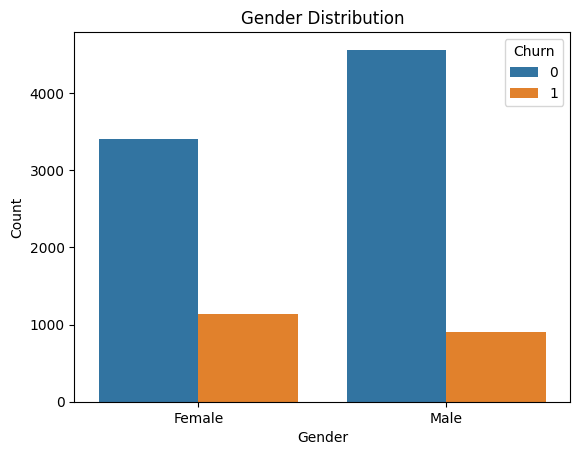

In [53]:
#gender and customer churn
sns.countplot(x = 'Gender', data = df, hue = 'Churn')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Age', ylabel='Count'>

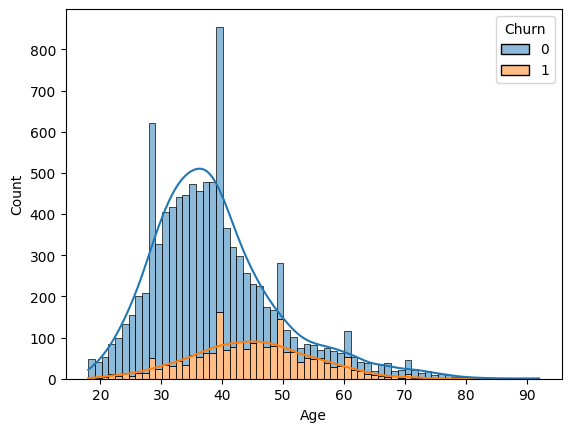

In [54]:
#histogram for age distribution
sns.histplot(data=df, x="Age", hue="Churn", multiple="stack",kde=True)

<Axes: xlabel='Churn', ylabel='CreditScore'>

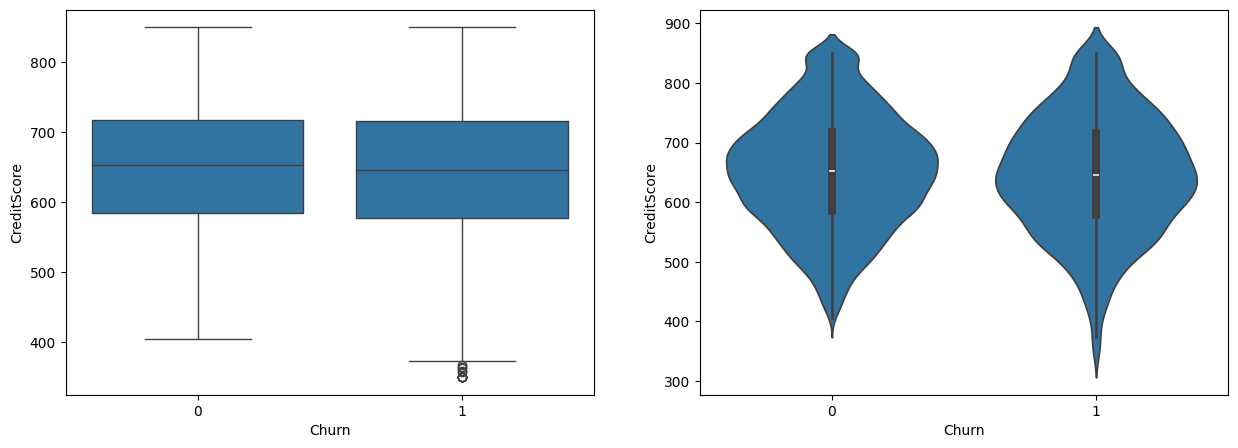

In [55]:
fig, ax = plt.subplots(1,2,figsize=(15, 5))
sns.boxplot(x="Churn", y="CreditScore", data=df, ax=ax[0])
sns.violinplot(x="Churn", y="CreditScore", data=df, ax=ax[1])

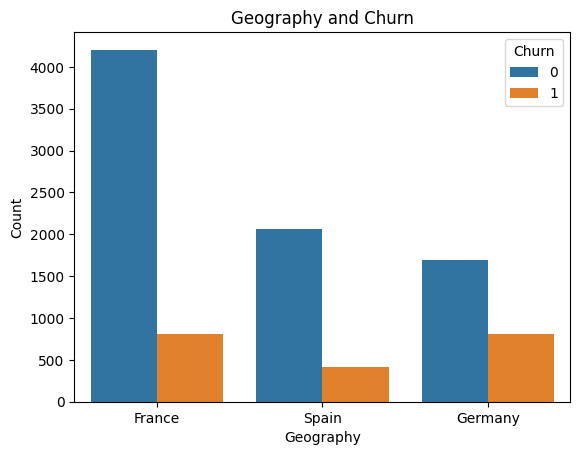

In [56]:
sns.countplot(x = 'Geography', hue = 'Churn', data = df)
plt.title('Geography and Churn')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Tenure', ylabel='count'>

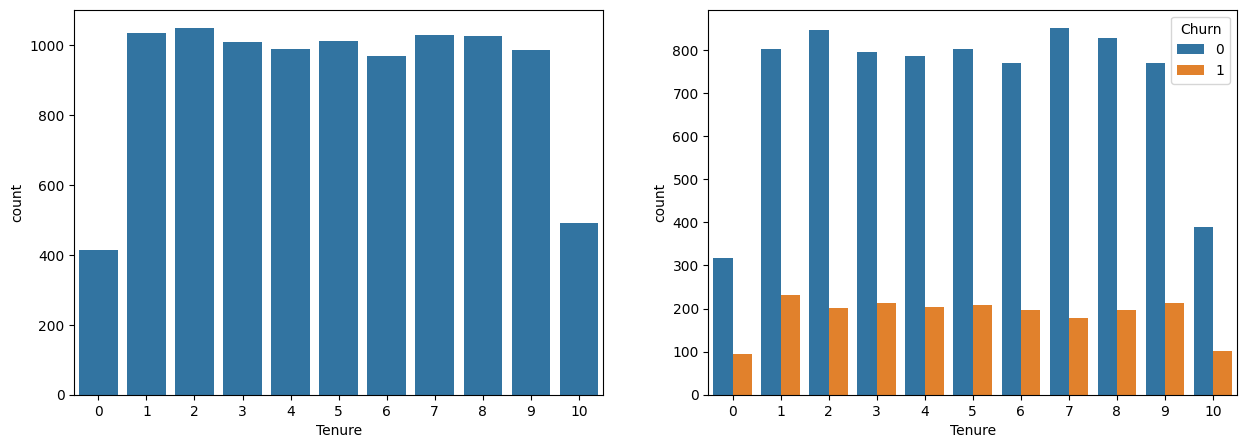

In [57]:
fig,ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x='Tenure', data=df,ax=ax[0])
sns.countplot(x='Tenure', hue='Churn', data=df,ax=ax[1])

<Axes: xlabel='Balance', ylabel='Count'>

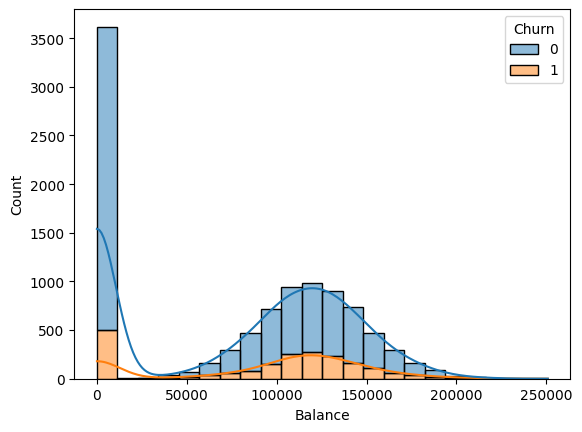

In [58]:
sns.histplot(data=df, x="Balance", hue="Churn", multiple="stack",kde=True)

<Axes: xlabel='NumOfProducts', ylabel='count'>

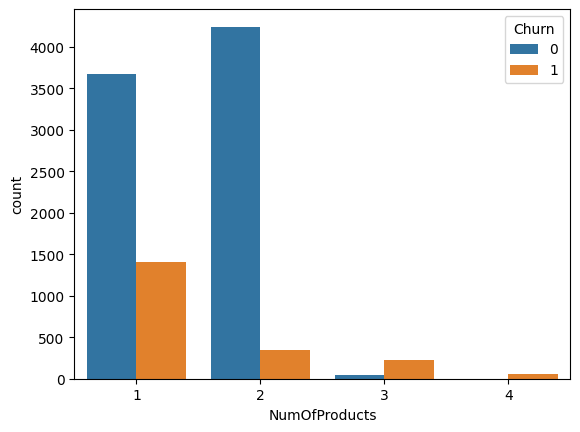

In [59]:
sns.countplot(x='NumOfProducts', hue='Churn', data=df)

<Axes: xlabel='HasCrCard', ylabel='count'>

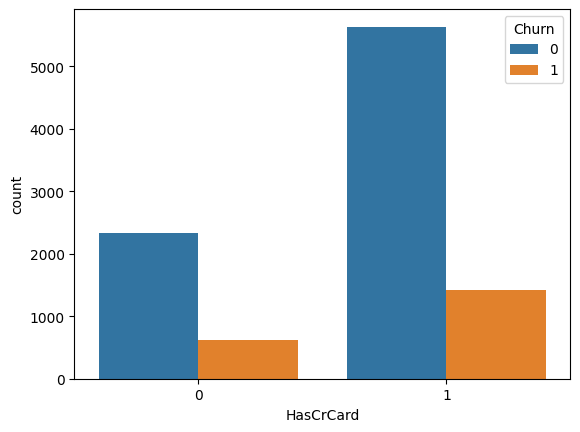

In [60]:
sns.countplot(x=df['HasCrCard'],hue=df['Churn'])

<Axes: xlabel='IsActiveMember', ylabel='count'>

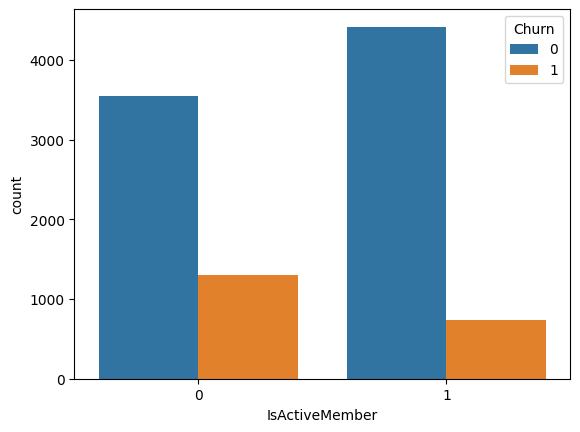

In [61]:
sns.countplot(x='IsActiveMember', hue='Churn', data=df)

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

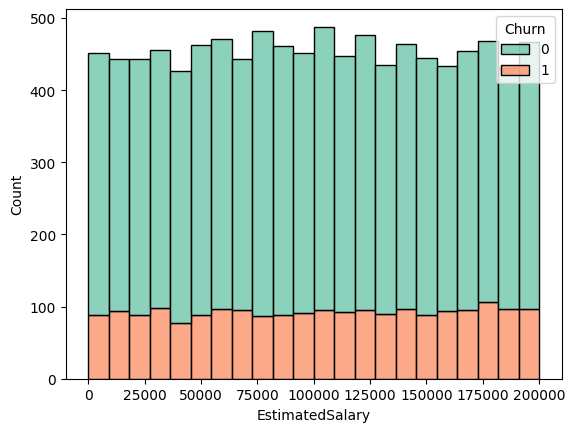

In [62]:
sns.histplot(data=df,x='EstimatedSalary',hue='Churn',multiple='stack',palette='Set2')

In [63]:
#label encoding
variables = ['Geography','Gender']
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in variables:
    le.fit(df[i].unique())
    df[i]=le.transform(df[i])
    print(i,df[i].unique())

Geography [0 2 1]
Gender [0 1]


In [64]:
#normalize the continuous variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['CreditScore','Balance','EstimatedSalary']] = scaler.fit_transform(df[['CreditScore','Balance','EstimatedSalary']])

In [65]:
df.head()

CreditScore  Geography  Gender  Age  Tenure   Balance  NumOfProducts  \
0    -0.326221          0       0   42       2 -1.225848              1   
1    -0.440036          2       0   41       1  0.117350              1   
2    -1.536794          0       0   42       8  1.333053              3   
3     0.501521          0       0   39       1 -1.225848              2   
4     2.063884          2       0   43       2  0.785728              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Churn  
0          1               1         0.021886      1  
1          0               1         0.216534      0  
2          1               0         0.240687      1  
3          0               0        -0.108918      0  
4          1               1        -0.365276      0

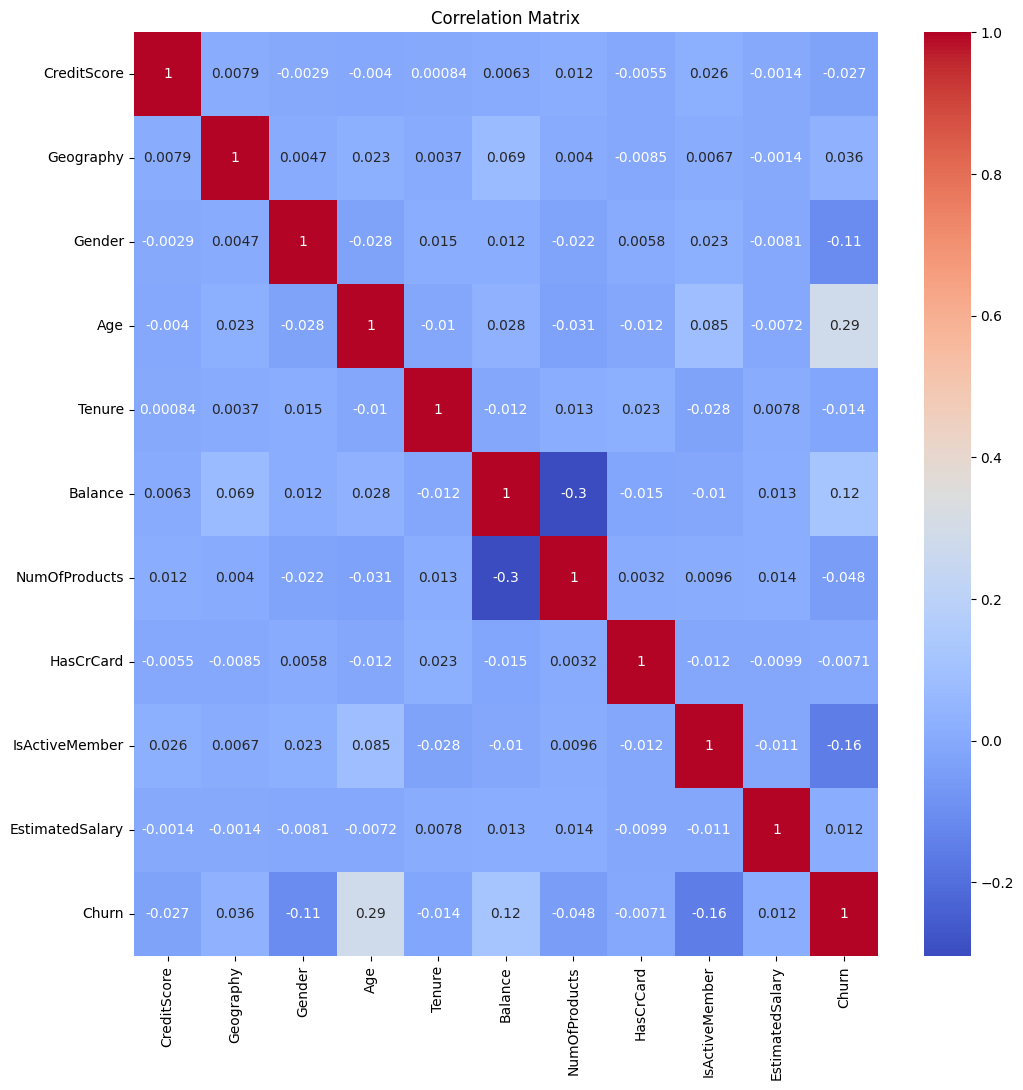

In [66]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [67]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop('Churn',axis=1),df['Churn'],test_size=0.3,random_state=42)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 192 candidates, totalling 960 fits


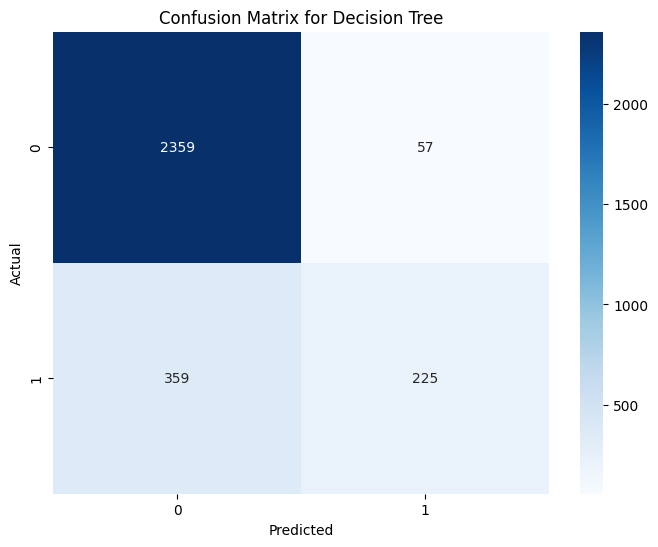

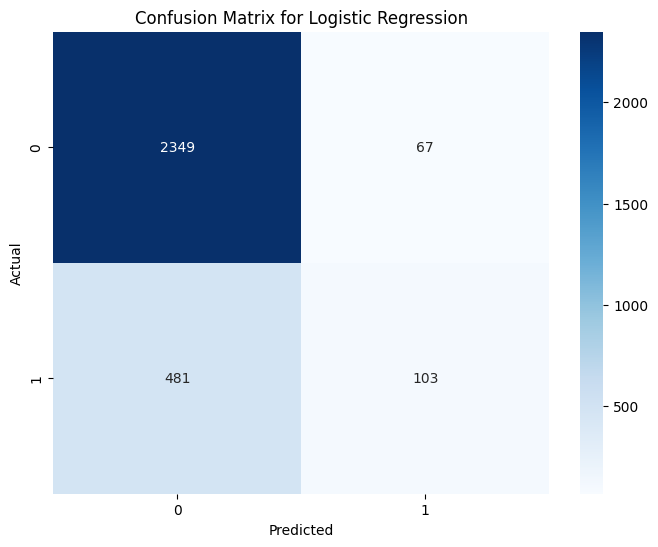

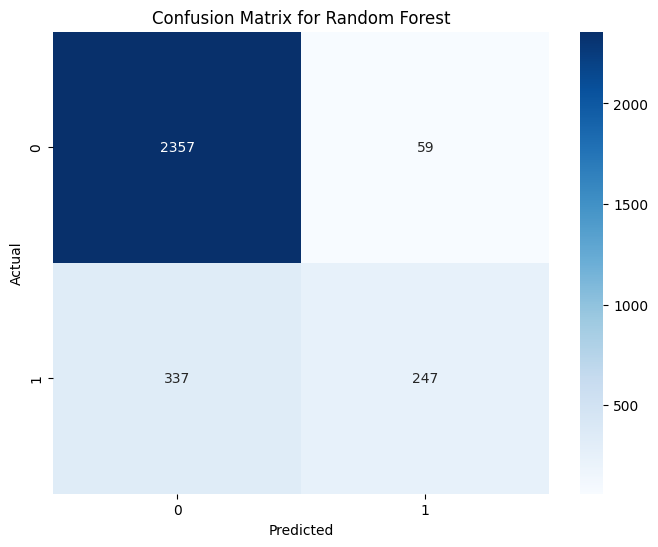

In [68]:
import mlflow
import mlflow.sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Set up MLflow experiment
mlflow.set_experiment("Customer Churn Prediction")

# Decision Tree Classifier
with mlflow.start_run(run_name="DecisionTree"):
    # Creating Decision Tree Classifier object
    dtree = DecisionTreeClassifier()

    # Defining parameter range
    param_grid = {
        'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
        'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'criterion': ['gini', 'entropy'],
        'random_state': [0, 42]
    }

    # Creating grid search object
    grid_dtree = GridSearchCV(dtree, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)

    # Fitting the grid search object to the training data
    grid_dtree.fit(X_train, y_train)

    # Log best parameters to MLflow
    mlflow.log_params(grid_dtree.best_params_)

    # Train the best model (from GridSearchCV)
    dtree_best = grid_dtree.best_estimator_

    # Evaluate the model
    dtree_pred = dtree_best.predict(X_test)
    accuracy = accuracy_score(y_test, dtree_pred)
    auc = roc_auc_score(y_test, dtree_pred)

    # Log metrics to MLflow
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("roc_auc", auc)

    # Log confusion matrix as an artifact
    cm = confusion_matrix(y_test, dtree_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Decision Tree')
    plt.savefig('confusion_matrix_dtree.png')
    mlflow.log_artifact('confusion_matrix_dtree.png')


# Logistic Regression
with mlflow.start_run(run_name="LogisticRegression"):
    # Creating Logistic Regression object
    logreg = LogisticRegression()

    # Defining parameter range (optional, you can add this based on the model's hyperparameters)
    param_grid_logreg = {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga']
    }

    # Creating grid search object
    grid_logreg = GridSearchCV(logreg, param_grid_logreg, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)

    # Fitting the grid search object to the training data
    grid_logreg.fit(X_train, y_train)

    # Log best parameters to MLflow
    mlflow.log_params(grid_logreg.best_params_)

    # Train the best model (from GridSearchCV)
    logreg_best = grid_logreg.best_estimator_

    # Evaluate the model
    logreg_pred = logreg_best.predict(X_test)
    accuracy_logreg = accuracy_score(y_test, logreg_pred)
    auc_logreg = roc_auc_score(y_test, logreg_pred)

    # Log metrics to MLflow
    mlflow.log_metric("accuracy", accuracy_logreg)
    mlflow.log_metric("roc_auc", auc_logreg)

    # Log confusion matrix as an artifact
    cm_logreg = confusion_matrix(y_test, logreg_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Logistic Regression')
    plt.savefig('confusion_matrix_logreg.png')
    mlflow.log_artifact('confusion_matrix_logreg.png')

with mlflow.start_run(run_name="RandomForest"):
    # Creating Random Forest Classifier object
    rf = RandomForestClassifier()

    # Defining parameter range
    param_grid_rf = {
        'n_estimators': [50, 100, 150, 200],
        'max_depth': [2, 4, 6, 8, 10, 12, 14, 16],
        'min_samples_split': [2, 5, 10],
        'random_state': [0, 42]
    }

    # Creating grid search object
    grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)

    # Fitting the grid search object to the training data
    grid_rf.fit(X_train, y_train)

    # Log best parameters to MLflow
    mlflow.log_params(grid_rf.best_params_)

    # Train the best model (from GridSearchCV)
    rf_best = grid_rf.best_estimator_

    # Evaluate the model
    rf_pred = rf_best.predict(X_test)
    accuracy_rf = accuracy_score(y_test, rf_pred)
    auc_rf = roc_auc_score(y_test, rf_pred)

    # Log metrics to MLflow
    mlflow.log_metric("accuracy", accuracy_rf)
    mlflow.log_metric("roc_auc", auc_rf)

    # Log confusion matrix as an artifact
    cm_rf = confusion_matrix(y_test, rf_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix for Random Forest')
    plt.savefig('confusion_matrix_rf.png')
    mlflow.log_artifact('confusion_matrix_rf.png')



C:\Users\Hp\AppData\Local\Temp\ipykernel_12712\2799666733.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\Hp\AppData\Local\Temp\ipykernel_12712\2799666733.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(

<Axes: xlabel='Churn', ylabel='Density'>

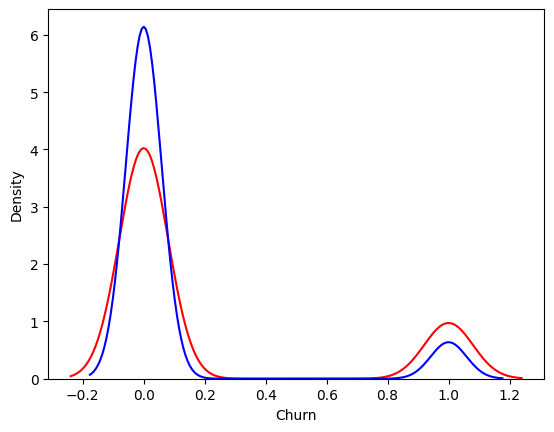

In [ ]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(dtree_pred, hist=False, color="b", label="Fitted Values" , ax=ax)

In [71]:
from sklearn.metrics import accuracy_score, mean_absolute_error, r2_score
print("Accuracy Score: ", accuracy_score(y_test, dtree_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, dtree_pred))
print("R2 Score: ", r2_score(y_test, dtree_pred))

Accuracy Score:  0.8613333333333333
Mean Absolute Error:  0.13866666666666666
R2 Score:  0.11548580241313633


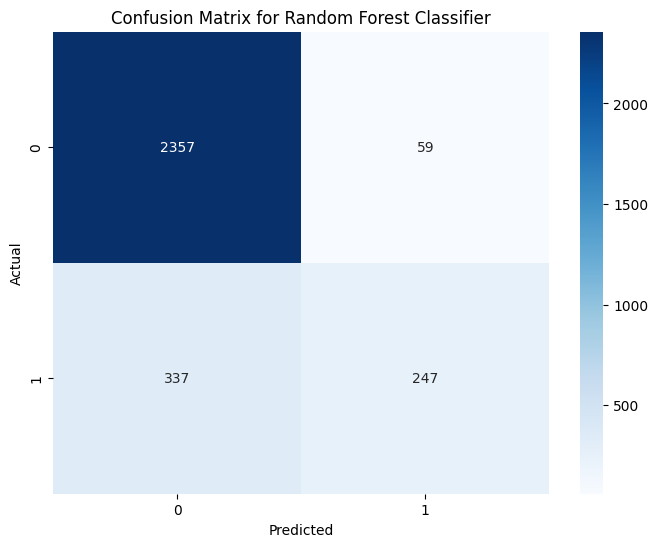

In [76]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,rf_pred),annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

C:\Users\Hp\AppData\Local\Temp\ipykernel_9364\2468428405.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\Hp\AppData\Local\Temp\ipykernel_9364\2468428405.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rf

<Axes: xlabel='Churn', ylabel='Density'>

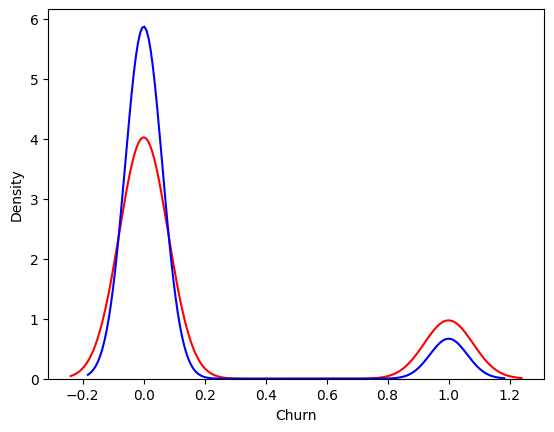

In [77]:
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(rf_pred, hist=False, color="b", label="Fitted Values" , ax=ax)

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2416
           1       0.81      0.42      0.56       584

    accuracy                           0.87      3000
   macro avg       0.84      0.70      0.74      3000
weighted avg       0.86      0.87      0.85      3000



In [80]:
print("Accuracy Score: ", accuracy_score(y_test, rf_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test, rf_pred))
print("R2 Score: ", r2_score(y_test, rf_pred))

Accuracy Score:  0.868
Mean Absolute Error:  0.132
R2 Score:  0.15801052345096633
